In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [93]:
df = pd.read_csv(r"iris.csv")

In [94]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [96]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [97]:
print("Shape of dataset:", df.shape)

Shape of dataset: (150, 5)


In [98]:
print("\nFirst 5 rows:\n", df.head())



First 5 rows:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [99]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [100]:
print("\n Duplicate Rows:", df.duplicated().sum())


 Duplicate Rows: 1


In [101]:
#duplicates rows removal
df = df.drop_duplicates()

In [102]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [103]:
import seaborn as sns

C:\Users\ankit\AppData\Local\Temp\ipykernel_6680\1704066111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data=df, palette="Set2")


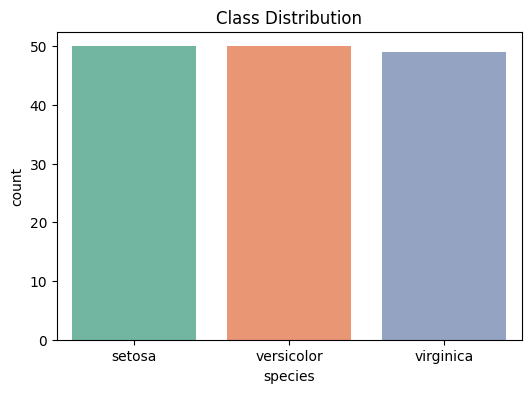

In [104]:
# --- Class Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x="species", data=df, palette="Set2")
plt.title("Class Distribution")
plt.show()

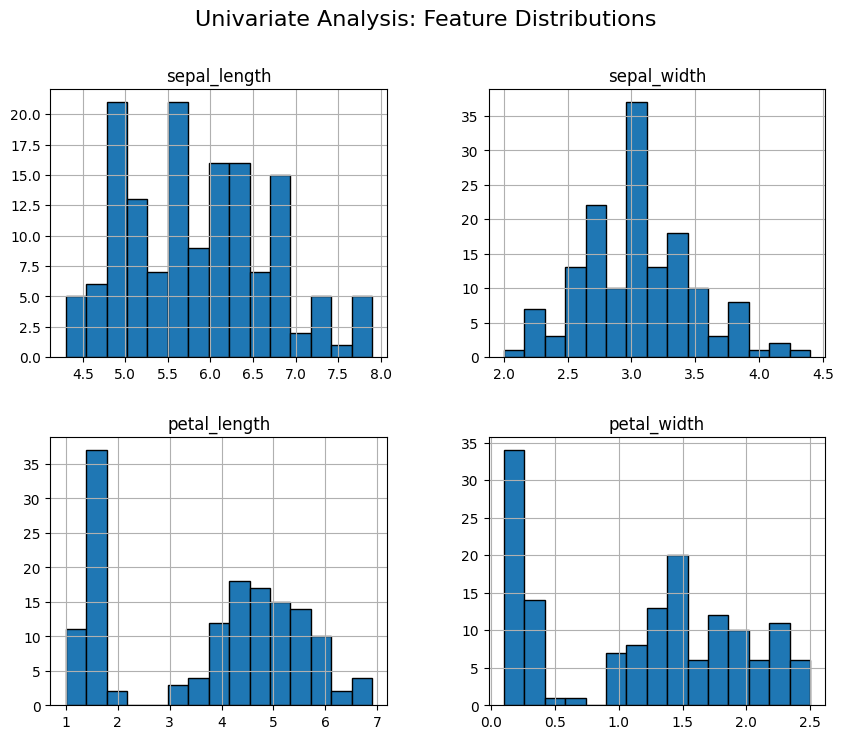

In [105]:
# --- Univariate Analysis (Histograms) ---
df.iloc[:,:-1].hist(figsize=(10,8), bins=15, edgecolor="black")
plt.suptitle("Univariate Analysis: Feature Distributions", fontsize=16)
plt.show()

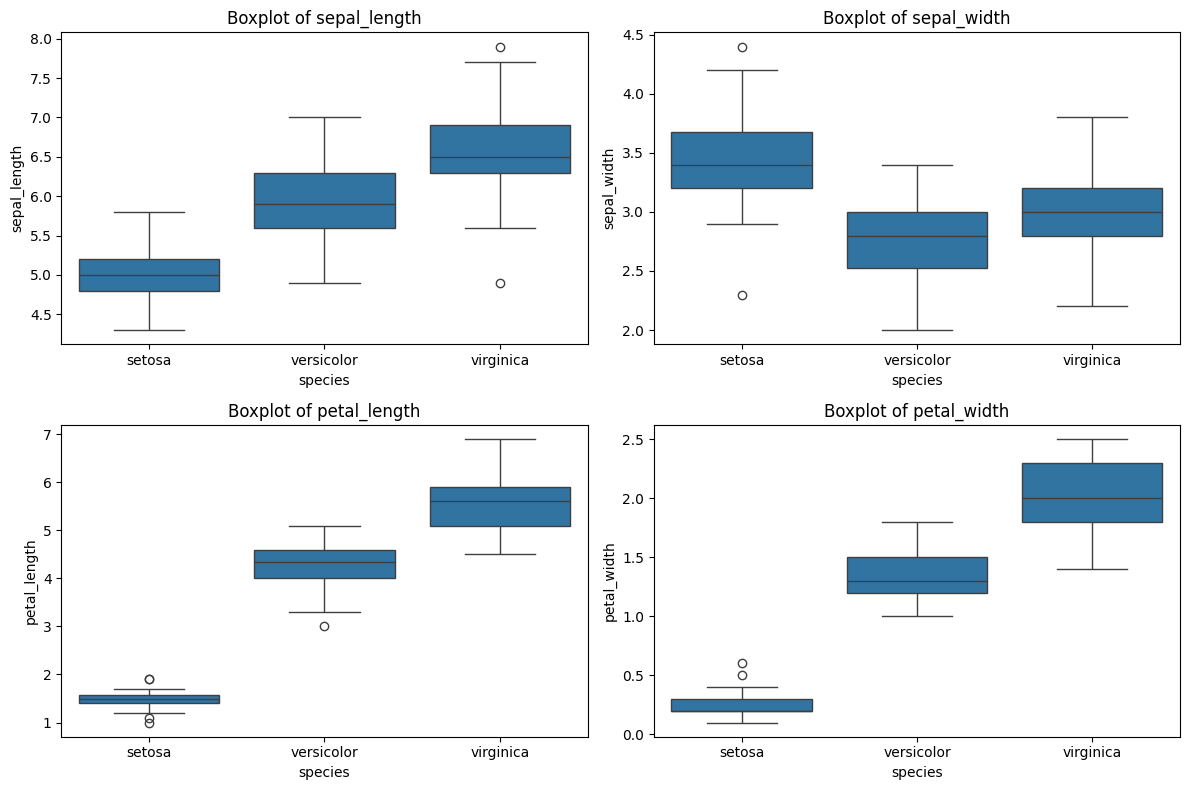

In [106]:
# --- Boxplots ---
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x="species", y=col, data=df)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

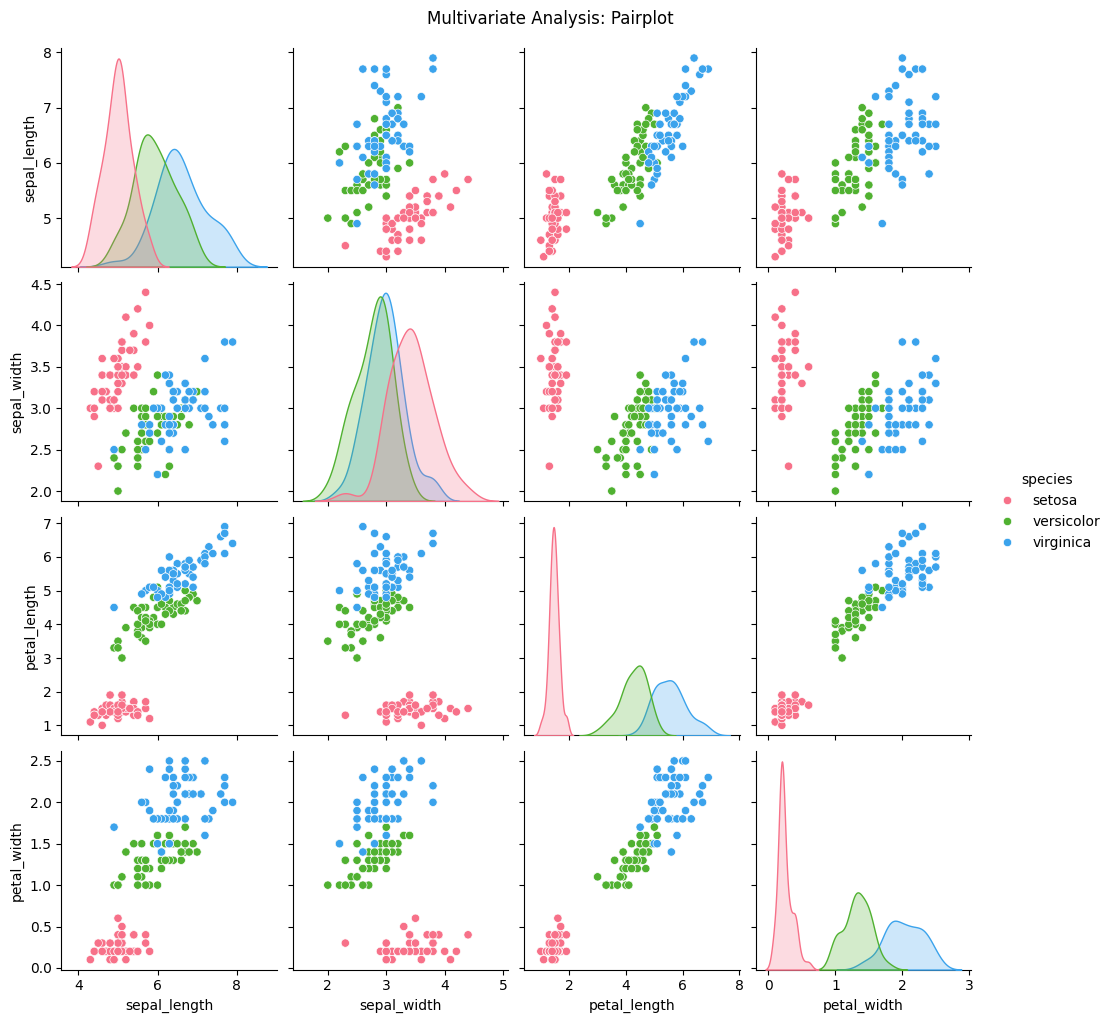

In [107]:
# --- Multivariate Analysis (Pairplot) ---
sns.pairplot(df, hue="species", diag_kind="kde", palette="husl")
plt.suptitle("Multivariate Analysis: Pairplot", y=1.02)
plt.show()

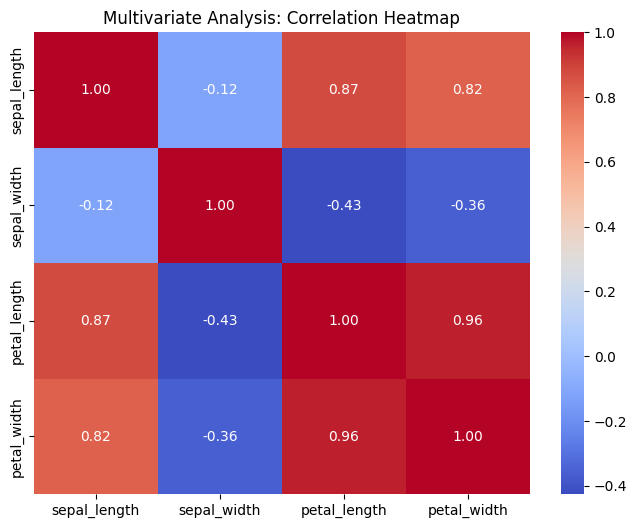

In [108]:
# --- Correlation Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Multivariate Analysis: Correlation Heatmap")
plt.show()

In [109]:
x = df.drop("species", axis=1)
y = df["species"]

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
# train model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [114]:
model.fit(x_train,y_train) 

RandomForestClassifier(random_state=42)

In [115]:
y_pred = model.predict(x_test)

In [116]:
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [118]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 1.0000


In [119]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [120]:
print("classification Report:\n", classification_report(y_test, y_pred))

classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [121]:
# ------------ save model ------------
with open("iris_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained and saved as iris_model.pkl")

✅ Model trained and saved as iris_model.pkl
